In [73]:
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy

In [74]:
def zobrazit_obl(u,x ,t):
    plt.figure(figsize=(10, 6))
    X, T = np.meshgrid(t, x)
    plt.contourf(T, X, u, 20, cmap='jet')
    plt.colorbar(label='u(x,t)')
    plt.xlabel('t')
    plt.ylabel('x')
    plt.title('Numerické řešení vlnové rovnice - Explicitní metoda')
    plt.show()

# Explicitní metoda

Pocatecni podminky

In [75]:
c = 1

x0, xn = 0., 1.
t0, tn = 0. , 2./c 

h = 0.1 
tau = 0.01

sigma = (c * tau)/ h
sigma

0.09999999999999999

Okrajove podminky

In [76]:
x = np.arange(x0, xn + h, h)
t = np.arange(t0, tn + tau, tau)
parametry = [x, t]

lenx, lent = len(x), len(t)

u = np.zeros((lenx, lent))
u[:, 0] = 0
u[0, :] = 0.2 * np.sin(np.pi * c * t)
u[-1, :] = 0

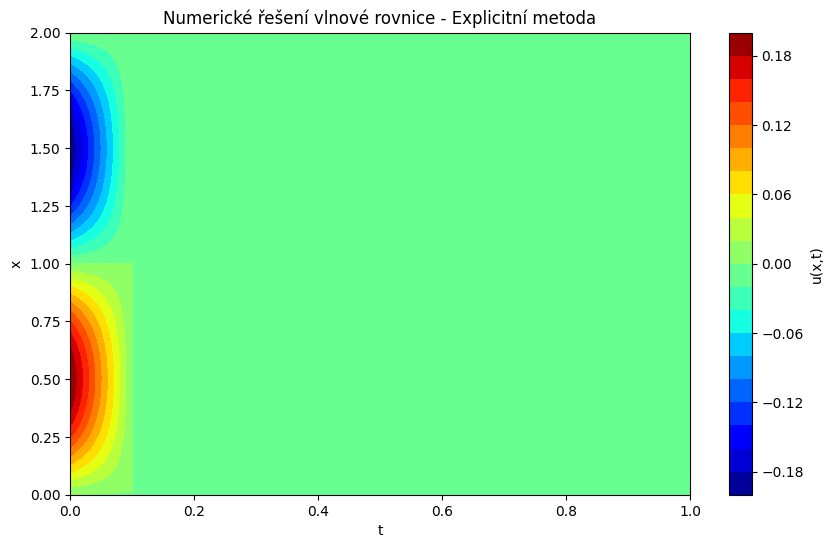

In [77]:
zobrazit_obl(u, *parametry)

In [78]:
novy_u = deepcopy(u)
for _ in range(100):
    for k in range(2,lent-1): #od k >=2
        for i in range(1, lenx - 1):
            novy_u[i,k+1] = ( (2.- 2. * sigma**2)* u[i,k] + 
                        sigma**2 * (u[i-1, k] + u[i+1,k]) -
                        u[i,k-1])
        u = deepcopy(novy_u)

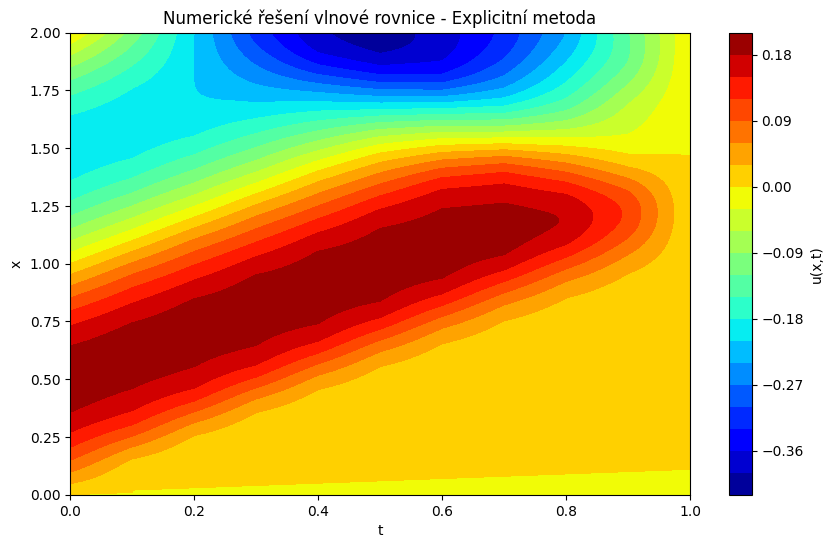

In [79]:
zobrazit_obl(u, *parametry)